In [31]:
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from tqdm import  tqdm
import seaborn as sns

In [32]:
sns.set()

In [33]:
addressBook = {"serializedData": "./SerializedData/",
              "excel": "./Excel/" }

In [34]:
allPapers = pk.loads(open(addressBook["serializedData"]+"allPapers.dic", "rb").read())
annualPapers = pk.loads(open(addressBook["serializedData"]+"annualPapers.dic", "rb").read())

In [35]:
### Co-Authorship Network Formation ###
AU, AF, BA, BF, BE = 0, 0, 0, 0, 0

for doi, paper in allPapers.items():
    if paper["AU"] != '':
        AU+=1
    elif paper["AF"] != '':
        AF+=1
    elif paper["BA"] != '':
        BA+=1
    elif paper["BF"] != '':
        BF+=1
    elif paper["BE"] != '':
        BE+=1

In [36]:
# Static Co-Authorship Network #
coauthorshipDict = {}
nodes = set()
for doi, paper in allPapers.items():
    authors = [auth.strip() for auth in paper["AU"].split(";")]
    if len(authors) == 0:
        continue
    elif len(authors) == 1:
        nodes.add(authors[0])
        if (authors[0],authors[0]) in coauthorshipDict.keys():
            coauthorshipDict[(authors[0],authors[0])] += 1
        else:
            coauthorshipDict[(authors[0], authors[0])] = 1
    else:
        authors = list(combinations(authors,2))
        for state in authors:
            nodes.add(state[0])
            nodes.add(state[1])
            reversedState = state[::-1]
            if state in coauthorshipDict.keys():
                coauthorshipDict[state] += 1
            elif reversedState in coauthorshipDict.keys():
                coauthorshipDict[reversedState] += 1
            else:
                coauthorshipDict[state] = 1

In [37]:
authorHistogramDynamic_nonDistinctive = {}
authorHistogramDynamic_distinctive = {}
temporarySet1 = set()
for year in annualPapers:
    authorsCount = 0
    newAuthorsCount = 0
    temporarySet2 = set()
    for paper_id in annualPapers[year]:
        if allPapers[paper_id]["AU"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["AU"].split(";")]
        elif allPapers[paper_id]["AF"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["AF"].split(";")]
        elif allPapers[paper_id]["BA"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["BA"].split(";")]
        elif allPapers[paper_id]["BF"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["BF"].split(";")]
        elif allPapers[paper_id]["BE"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["BE"].split(";")]
        else:
            print("@@@@@@@@@@@@@@@@@@@@@@")
        for author in authors:
            if author not in temporarySet2:
                authorsCount += 1
                temporarySet2.add(author)
            if author not in temporarySet1:
                newAuthorsCount += 1
                temporarySet1.add(author)
    authorHistogramDynamic_nonDistinctive[year] = authorsCount
    authorHistogramDynamic_distinctive[year] = newAuthorsCount

@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@


In [38]:
newcomersDict = {}
incumbentsDict = {}

newcomers = []
incumbents = []

for year in tqdm(annualPapers):
    yearlyNewcomers = []
    yearlyIncumbents = []
    for paper_id in annualPapers[year]:
        if allPapers[paper_id]["AU"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["AU"].split(";")]
        elif allPapers[paper_id]["AF"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["AF"].split(";")]
        elif allPapers[paper_id]["BA"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["BA"].split(";")]
        elif allPapers[paper_id]["BF"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["BF"].split(";")]
        elif allPapers[paper_id]["BE"] != '':
            authors = [auth.strip().rstrip().lower() for auth in allPapers[paper_id]["BE"].split(";")]
        else:
            print("@@@@@@@@@@@@@@@@@@@@@@")
        for author in authors:
            if author in newcomers:
                newcomers.remove(author)
                incumbents.append(author)
                yearlyIncumbents.append(author)
                if author in yearlyNewcomers:
                    yearlyNewcomers.remove(author)
            elif author in incumbents:
                incumbents.append(author)
                yearlyIncumbents.append(author)
            else:
                newcomers.append(author)
                yearlyNewcomers.append(author)
    newcomersDict[year] = len(yearlyNewcomers)
    incumbentsDict[year] = len(yearlyIncumbents)

  6%|███████▉                                                                                                                              | 7/119 [00:07<02:08,  1.15s/it]

@@@@@@@@@@@@@@@@@@@@@@


 63%|███████████████████████████████████████████████████████████████████████████████████▊                                                 | 75/119 [00:35<00:02, 18.74it/s]

@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 119/119 [00:37<00:00,  3.19it/s]

@@@@@@@@@@@@@@@@@@@@@@


In [39]:
dfNewcomers = pd.DataFrame(columns=["Year", "Publication"])
for c, year in enumerate(newcomersDict):
    dfNewcomers.loc[c] = [int(year), int(newcomersDict[year])]

In [40]:
dfIncumbents = pd.DataFrame(columns=["Year", "Publication"])
for c, year in enumerate(incumbentsDict):
    dfIncumbents.loc[c] = [int(year), int(incumbentsDict[year])]

In [41]:
dfIncumbents["Year"] = pd.to_numeric(dfIncumbents["Year"])
dfIncumbents["Publication"] = pd.to_numeric(dfIncumbents["Publication"])

In [42]:
dfNewcomers["Year"] = pd.to_numeric(dfNewcomers["Year"])
dfNewcomers["Publication"] = pd.to_numeric(dfNewcomers["Publication"])

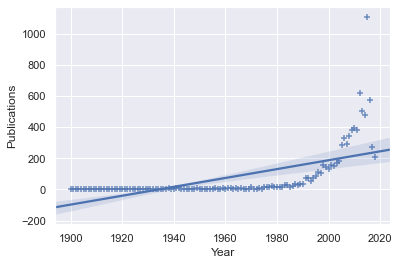

In [43]:
x=dfIncumbents["Year"]
y=dfIncumbents["Publication"]



sns_plot = sns.regplot(x, y, marker="+", color="b", truncate=False, x_jitter=.1, order=1)
plt.ylabel("Publications")


fig = sns_plot.get_figure()

In [44]:
x=dfNewcomers["Year"]
y=dfNewcomers["Publication"]

sns_plot = sns.regplot(x, y, marker="+", color="b", truncate=False, x_jitter=.1, order=1)
plt.ylabel("Publications")
# scatter_kws = {"color": "blue", "alpha": 0.8}, line_kws = {"color": "#CCCC00", "alpha": 0.3}

fig = sns_plot.get_figure()

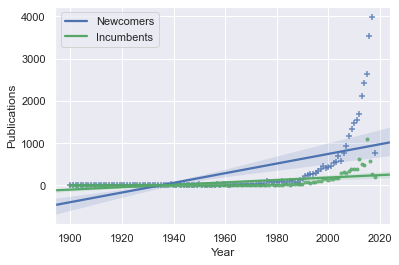

In [45]:
x1=dfNewcomers["Year"]
y1=dfNewcomers["Publication"]

x2=dfIncumbents["Year"]
y2=dfIncumbents["Publication"]

sns_plot = sns.regplot(x1, y1, marker="+", color="b", truncate=False, x_jitter=.1, order=1)
sns_plot = sns.regplot(x2, y2, marker=".", color="g", truncate=False, x_jitter=.1, order=1)

plt.xlabel("Year")
plt.ylabel("Publications")

plt.legend(["Newcomers","Incumbents"])

fig = sns_plot.get_figure()

In [46]:
newcomersContribution = pd.read_csv(addressBook["excel"]+"newcomersContribution.csv", sep=";")
x=newcomersContribution["Year"]
y=newcomersContribution["Incumbents"]/newcomersContribution["Aggregated Newcomers"]

sns_plot = sns.regplot(x, y, marker=".", color="b", truncate=False, x_jitter=.1, order=1)

plt.xlabel("Year")
plt.ylabel("Newcomers contribution")

fig = sns_plot.get_figure()

In [47]:
authorsDict = {}
for doi, paper in allPapers.items():
    authors = [auth.strip() for auth in paper["AU"].split(";")]
    if len(authors)!=0:
        for author in authors:
            if author in authorsDict.keys():
                authorsDict[author]+=1
            else:
                authorsDict[author]=1

In [48]:
authorsDataFrame = pd.DataFrame.from_dict(authorsDict, orient="index")

In [49]:
authorsDataFrame.reset_index(inplace=True)
authorsDataFrame = authorsDataFrame.rename(index=str , columns={0:"Publications Count", "index":"Author"})

In [50]:
authorsCountDataFrame = authorsDataFrame.groupby("Publications Count").count().reset_index().rename(columns={"Publications Count":"Number of Publications","Author":"Author Count"})

In [51]:
sum = 0
newAuthorsCountDataFrame = pd.DataFrame(columns=["Number of Publications", "Author Count"])
for i in range(0,len(authorsCountDataFrame)):
    if i==0:
        newAuthorsCountDataFrame.loc[i] = ["Newcomers publications", authorsCountDataFrame.loc[i]["Author Count"]]    
    elif i>0:
        sum += authorsCountDataFrame.loc[i]["Author Count"]
newAuthorsCountDataFrame.loc[3]=["Incumbents publications", sum]

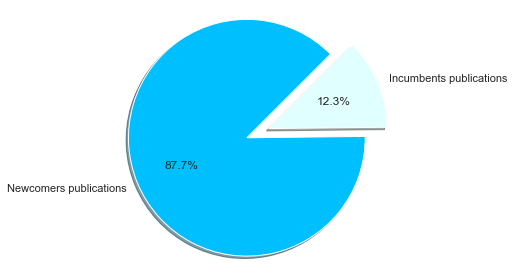

In [52]:
newAuthorsCountDataFrame
colors = ['deepskyblue', 'lightcyan']
plt.pie(
    # using data total)arrests
    newAuthorsCountDataFrame['Author Count'],
    # with the labels being officer names
    labels=newAuthorsCountDataFrame['Number of Publications'],
    # with no shadows
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0.2),
    # with the start angle at 90%
    startangle=45,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()